In [1]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 43.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires protobuf<4,>3.12.2, but you have protobuf 4.25.5 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 16.1.0 which is inc

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ufl04ATrDjaUKYZdsr6y")
project = rf.workspace("sam-vcqdz").project("object-detection-ikxzz")
version = project.version(1)
dataset = version.download("yolov11")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Object-Detection-1 in yolov11:: 100%|██████████| 9040/9040 [00:01<00:00, 6630.09it/s]


In [18]:
import numpy as np
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import glob
import pandas as pd
import path, os
from tqdm import tqdm
# Initialize MediaPipe for pose estimation
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
def extract_landmarks(folder_path):
    full_images_path = os.path.join(folder_path, 'images/*.jpg')
    full_labels_path = os.path.join(folder_path, 'labels/*.txt')
    len_images = len(glob.glob(full_images_path))
    # Load the image
    Pos_estimation = []
    labels = []
    for i in tqdm(range(len_images)):
        image_path = (glob.glob(full_images_path)[i])
        label_path = (glob.glob(full_labels_path)[i])
        image = cv2.imread(image_path)
        rows, cols, _ = image.shape
        swap = []
        if image is None:
            print("Image not found.")
        else:
            with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
                # Convert image to RGB and process it with MediaPipe Pose
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                results = pose.process(image_rgb)
                # Check if landmarks are detected
                if results.pose_landmarks:
                    # Extract coordinates for lying down detection
                    landmarks = results.pose_landmarks.landmark
                    for id, lm in enumerate(landmarks):
                        cx, cy = int(lm.x*cols), int(lm.y*rows)
                        swap.extend([cx, cy])
                    try:
                        with open(label_path, 'r') as f:
                            text = f.read().strip()
                            if text:  # Ensure text is not empty
                                labels.append(int(text.split(' ')[0]))  # Convert to integer
                                Pos_estimation.append(swap)
                            else:
                                print(f"Warning: Empty label in {label_path}")
                    except ValueError as e:
                        print(f"Error reading label from {label_path}: {e}")
                        
    df = pd.DataFrame(Pos_estimation)
    df['label'] = labels
    return df


In [20]:
df_train = extract_landmarks('/kaggle/working/Object-Detection-1/train')

  0%|          | 0/3160 [00:00<?, ?it/s]W0000 00:00:1731386035.266721   23717 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731386035.313384   23717 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  0%|          | 1/3160 [00:00<10:52,  4.84it/s]W0000 00:00:1731386035.466662   23722 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731386035.489328   23722 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  0%|          | 2/3160 [00:00<09:52,  5.33it/s]W0000 00:00:1731386035.645013   23724 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature infer

In [21]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,label
0,246,246,235,244,233,244,232,245,236,243,...,255,464,276,487,275,477,237,514,207,3
1,200,315,199,306,201,304,203,302,197,310,...,404,364,371,363,393,384,401,388,407,0
2,122,214,109,211,109,211,109,211,106,216,...,238,455,298,457,262,472,218,461,164,1
3,100,321,86,312,86,306,86,302,85,328,...,334,584,298,582,332,624,309,622,327,2
4,505,325,516,327,517,329,518,331,515,325,...,395,56,421,80,405,23,381,52,366,3


In [22]:
df_train.shape

(2438, 67)

In [19]:
df_valid = extract_landmarks('/kaggle/working/Object-Detection-1/valid')

  0%|          | 0/903 [00:00<?, ?it/s]W0000 00:00:1731385885.322770   20106 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731385885.360043   20106 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  0%|          | 1/903 [00:00<02:37,  5.72it/s]W0000 00:00:1731385885.504145   20109 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731385885.542641   20108 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  0%|          | 2/903 [00:00<02:41,  5.57it/s]W0000 00:00:1731385885.671986   20113 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inferenc

W0000 00:00:1731385991.669387   22672 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731385991.697845   22672 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 71%|███████   | 643/903 [01:46<00:41,  6.33it/s]W0000 00:00:1731385991.839974   22676 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731385991.877555   22676 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
 71%|███████▏  | 644/903 [01:46<00:42,  6.05it/s]W0000 00:00:1731385992.009066   22682 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback t

In [23]:
df_valid.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,label
0,154,237,136,230,134,225,131,219,139,241,...,443,556,418,539,425,537,508,538,513,2
1,374,131,381,122,385,124,388,125,369,117,...,467,250,528,248,474,222,562,205,522,0
2,209,349,208,340,209,338,211,336,205,346,...,424,389,387,392,409,412,417,411,435,2
3,253,281,256,279,258,279,259,279,252,279,...,527,369,522,332,537,405,507,320,553,3
4,351,73,357,70,363,70,368,71,341,72,...,526,371,540,289,537,325,582,302,581,0


In [24]:
df_valid.shape

(708, 67)

In [16]:
df_test = extract_landmarks('/kaggle/working/Object-Detection-1/test')
df_test.head()

  0%|          | 0/451 [00:00<?, ?it/s]W0000 00:00:1731385696.572084   18274 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731385696.594920   18274 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  0%|          | 1/451 [00:00<01:05,  6.88it/s]W0000 00:00:1731385696.719967   18278 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731385696.742669   18278 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  0%|          | 2/451 [00:00<01:00,  7.44it/s]W0000 00:00:1731385696.845864   18281 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inferenc

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,label
0,244,376,235,393,231,395,226,396,253,394,...,140,170,133,311,142,119,100,338,92,3
1,463,130,460,118,459,118,457,117,458,117,...,495,289,369,339,515,269,419,408,536,3
2,528,306,541,302,540,303,540,304,541,294,...,203,18,208,-6,191,-32,221,-45,203,0
3,304,146,305,134,308,131,311,128,297,140,...,432,344,557,384,424,309,597,366,484,2
4,352,127,356,118,355,118,354,117,353,115,...,460,410,415,328,483,485,417,406,497,2


In [25]:
df_test.shape

(340, 67)

In [26]:
df_train.to_csv('train.csv', index = False)
df_valid.to_csv('valid.csv', index = False)
df_test.to_csv('test.csv', index = False)

In [27]:
data = pd.concat([df_train, df_valid, df_test])

In [28]:
data.shape

(3486, 67)

In [37]:
data.duplicated().sum()

0

In [38]:
data.to_csv('data.csv', index = False)

In [39]:
X = data.drop(columns = ['label'])
y = data['label']

In [40]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,246,246,235,244,233,244,232,245,236,243,...,477,255,464,276,487,275,477,237,514,207
1,200,315,199,306,201,304,203,302,197,310,...,358,404,364,371,363,393,384,401,388,407
2,122,214,109,211,109,211,109,211,106,216,...,416,238,455,298,457,262,472,218,461,164
3,100,321,86,312,86,306,86,302,85,328,...,576,334,584,298,582,332,624,309,622,327
4,505,325,516,327,517,329,518,331,515,325,...,94,395,56,421,80,405,23,381,52,366


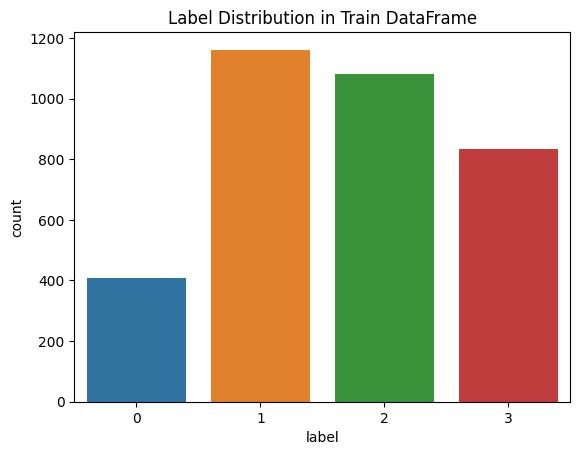

In [41]:
import seaborn as sns
sns.countplot(data = data , x='label')
plt.title('Label Distribution in Train DataFrame')
plt.show()

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [44]:
from sklearn.utils import shuffle
X,y=shuffle(X,y)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   test_size= 0.15, random_state=45, stratify=y)

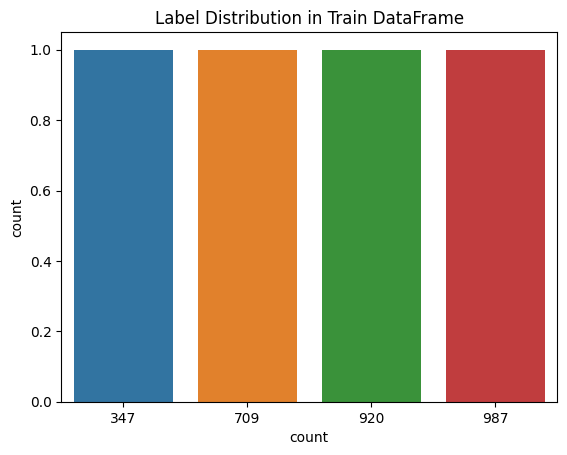

In [48]:
sns.countplot(x = y_train.value_counts())
plt.title('Label Distribution in Train DataFrame')
plt.show()

In [ ]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [49]:
X_train.shape ,y_train.shape

((2963, 66), (2963,))

In [50]:
X_test.shape ,y_test.shape

((523, 66), (523,))

In [ ]:
# fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# # Plot count for df_train
# sns.countplot(x=df_train['label'], ax=axes[0])
# axes[0].set_title('Label Distribution in Train DataFrame')
# axes[0].set_xlabel('Labels')
# axes[0].set_ylabel('Count')

# # Plot count for df_valid
# sns.countplot(x=df_valid['label'], ax=axes[1])
# axes[1].set_title('Label Distribution in Valid DataFrame')
# axes[1].set_xlabel('Labels')
# axes[1].set_ylabel('Count')

# # Plot count for df_test
# sns.countplot(x=df_test['label'], ax=axes[2])
# axes[2].set_title('Label Distribution in Test DataFrame')
# axes[2].set_xlabel('Labels')
# axes[2].set_ylabel('Count')

# # Adjust the layout for better spacing between subplots
# plt.tight_layout()
# plt.show()

In [ ]:
# X_train = df_train.drop(columns=['label'])
# y_train = df_train['label']

# X_test = df_test.drop(columns=['label'])
# y_test = df_test['label']

# X_valid = df_valid.drop(columns=['label'])
# y_valid = df_valid['label']


In [ ]:
# X_train.describe()

In [ ]:
# X_valid.describe()

In [ ]:
# X_test.describe()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_valid = scaler.transform(X_valid)

In [ ]:
# from sklearn.utils import shuffle
# X_train, y_train = shuffle(X_train, y_train, random_state=42)
# X_test, y_test = shuffle(X_test, y_test, random_state=42)
# X_valid, y_valid = shuffle(X_valid, y_valid, random_state=42)

In [ ]:
# X_train_combined = pd.concat([X_train, X_valid])
# y_train_combined = pd.concat([y_train, y_valid])

In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.linear_model import SGDClassifier, Perceptron, LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import  QuadraticDiscriminantAnalysis
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.


In [52]:
models = {
    'LinearSVC': LinearSVC(),
    'SGDClassifier': SGDClassifier(),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(10,)),
    'Perceptron': Perceptron(),
    'LogisticRegression': LogisticRegression(),
    'LogisticRegressionCV': LogisticRegressionCV(),
    'SVC': SVC(),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(),
    'LabelPropagation': LabelPropagation(),
    'LabelSpreading': LabelSpreading(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
    'RidgeClassifierCV': RidgeClassifierCV(),
    'RidgeClassifier': RidgeClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'BernoulliNB': BernoulliNB(),
    'GaussianNB': GaussianNB(),
    'NuSVC': NuSVC(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'CheckingClassifier': DummyClassifier(strategy='constant', constant=1),
    'DummyClassifier': DummyClassifier(strategy='uniform')
}


In [53]:
results = []
models_name = []

for name, model in tqdm(models.items()):
    model.fit(X_train, y_train)  # Train on combined data (train + valid)
    predictions = model.predict(X_test)  # Evaluate on the test data
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    
    # Store the results and model name
    models_name.append(name)
    results.append([accuracy, precision, recall, f1])

 11%|█         | 3/27 [00:03<00:22,  1.06it/s]Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 19%|█▊        | 5/27 [00:03<00:09,  2.21it/s]lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the document

In [54]:
Model_accuracy = pd.DataFrame(results,index=models_name,columns = ['Accuracy','Precision','Recall','F1 Score'])

In [55]:
Model_accuracy

,Accuracy,Precision,Recall,F1 Score
LinearSVC,0.340344,0.268277,0.340344,0.274294
SGDClassifier,0.321224,0.177780,0.321224,0.226033
MLPClassifier,0.330784,0.363953,0.330784,0.236351
Perceptron,0.242830,0.138692,0.242830,0.174760
LogisticRegression,0.313576,0.235203,0.313576,0.249940
LogisticRegressionCV,0.332696,0.110687,0.332696,0.166109
SVC,0.342256,0.288480,0.342256,0.265040
PassiveAggressiveClassifier,0.290631,0.132697,0.290631,0.182203
LabelPropagation,0.300191,0.282051,0.300191,0.286424
LabelSpreading,0.311663,0.289681,0.311663,0.294363


In [56]:
max_indices = Model_accuracy.idxmax()
L=list(Model_accuracy.loc[max_indices[0]])
print(f"Model is {max_indices[0]}\nAccuracy:  {L[0]:.2f},\nPrecision: {L[1]:.2f}, \nRecall:    {L[2]:.2f}, \nF1 Score:  {L[3]:.2f}")

Model is SVC
Accuracy:  0.34,
Precision: 0.29, 
Recall:    0.34, 
F1 Score:  0.27


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


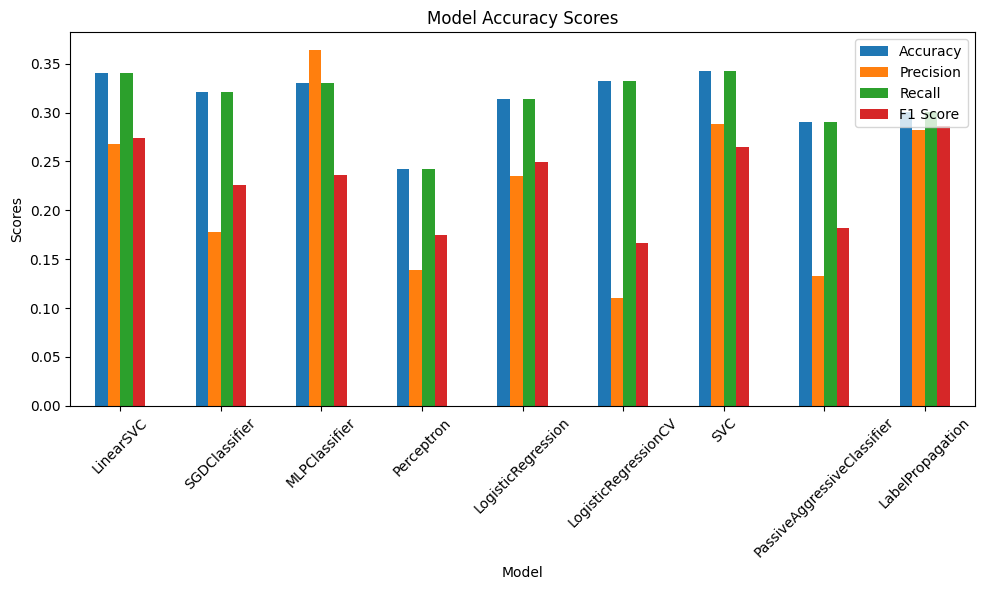

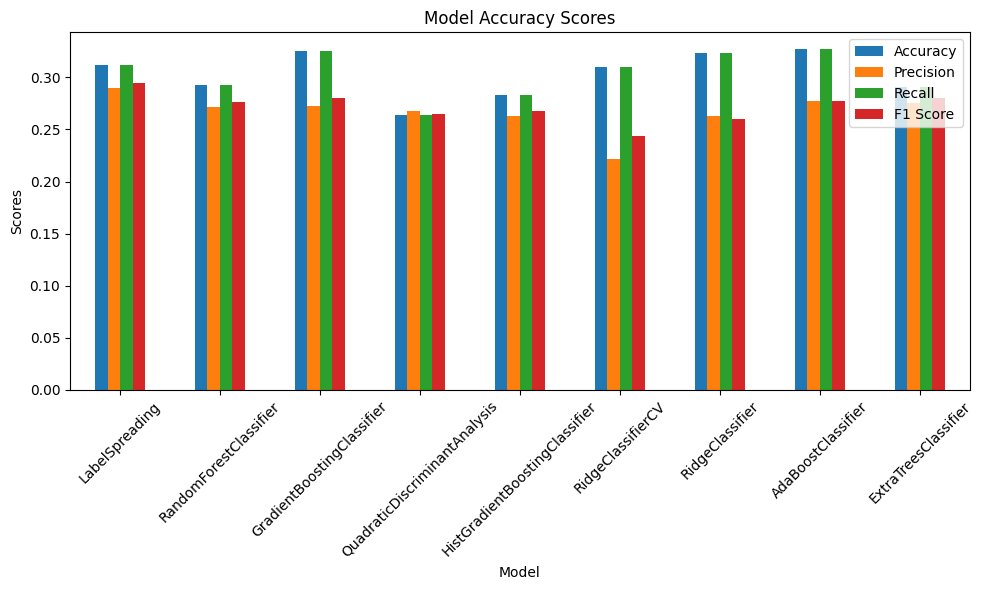

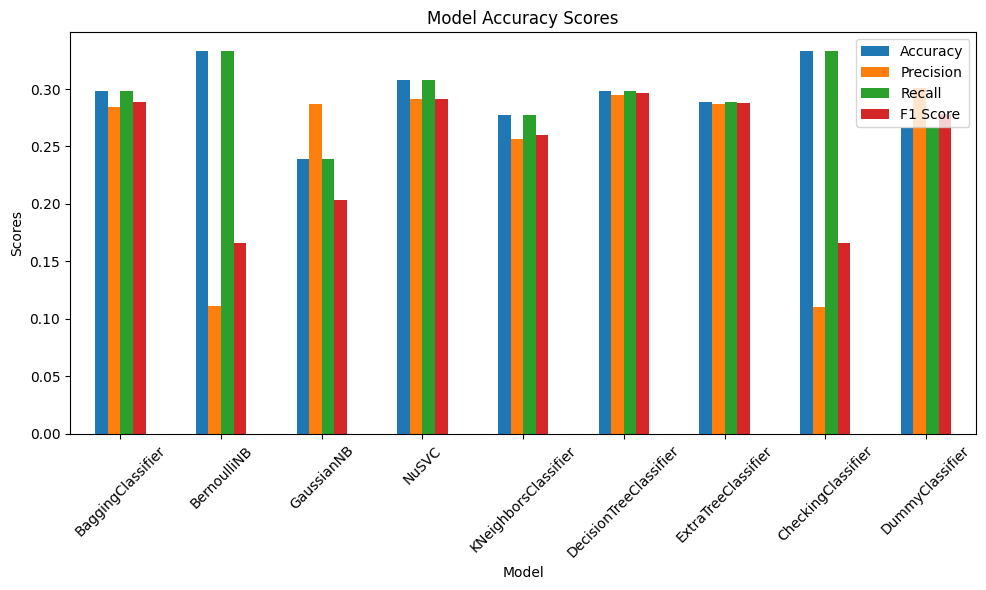

In [57]:
import matplotlib.pyplot as plt
Model_accuracy.iloc[:9,].plot(kind='bar', figsize=(10, 6))

# Customizing the plot

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()
print("""

""")
# Plotting

Model_accuracy.iloc[9:18,].plot(kind='bar', figsize=(10, 6))

# Customizing the plot
plt.title('Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to fit labels
# Display the plot
plt.show()
print("""

""")

# Plotting

Model_accuracy.iloc[18:,].plot(kind='bar', figsize=(10, 6))

# Customizing the plot
plt.title('Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout

# Define the Keras model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 8 neurons=
model.add(BatchNormalization())    
model.add(Dropout(0.25))    
model.add(Dense(256, activation='relu')) 
model.add(BatchNormalization())    
model.add(Dropout(0.25))    
model.add(Dense(128, activation='relu')) 
model.add(BatchNormalization())    
model.add(Dropout(0.25))    
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())    
model.add(Dropout(0.25))    
model.add(Dense(1, activation='sigmoid'))             # Output layer with 1 neuron for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
model.summary()

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        34,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,689 (823.00 KB)

 Trainable params: 208,769 (815.50 KB)

 Non-trainable params: 1,920 (7.50 KB)

In [59]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = ModelCheckpoint('/model.h5', verbose=5, save_best_only=True)
early_stopping = EarlyStopping(patience=10,restore_best_weights=True,monitor='val_loss')

In [60]:
history = model.fit(X_train,y_train,batch_size=16,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/100


I0000 00:00:1731387413.353288   36567 service.cc:145] XLA service 0x7d64c400e220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731387413.353354   36567 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 66/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2407 - loss: 0.8389

I0000 00:00:1731387420.404067   36567 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


186/186 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.2591 - loss: 0.4000 - val_accuracy: 0.3327 - val_loss: -0.8397
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3197 - loss: -2.0623 - val_accuracy: 0.3327 - val_loss: -3.9427
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3280 - loss: -5.8674 - val_accuracy: 0.3327 - val_loss: -19.6640
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3129 - loss: -14.8393 - val_accuracy: 0.3117 - val_loss: -25.6952
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3307 - loss: -29.4653 - val_accuracy: 0.3059 - val_loss: -13.7082
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3181 - loss: -52.6927 - val_accuracy: 0.3327 - val_loss: -109.2738
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3212 - loss: -82.4943 - val_accuracy: 0.3327 - val_loss: -102.9301
Epoch 8/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3386 - loss: -11

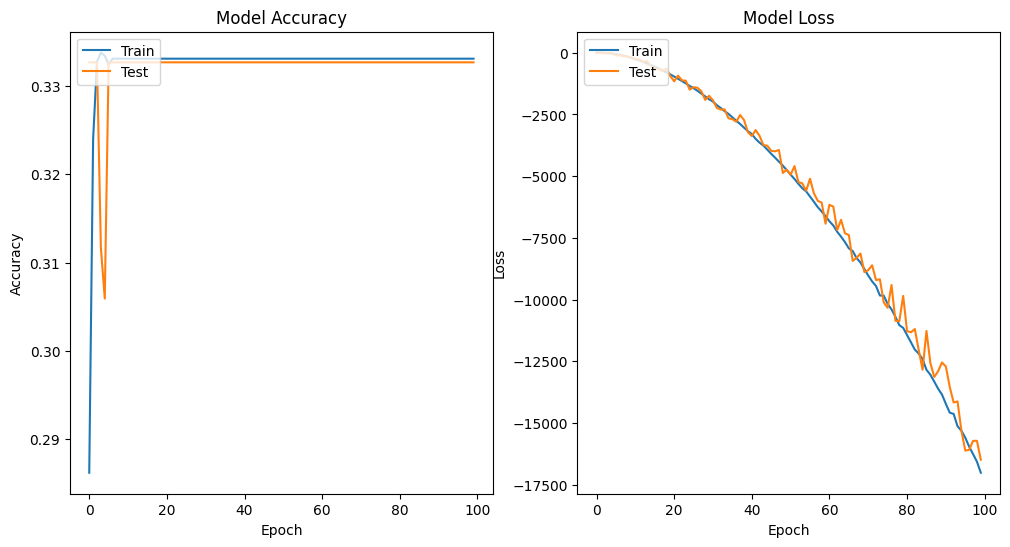

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [62]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sns

# Assuming 'model' is your trained Keras model and 'X_test', 'Y_test' are your test datasets.

# Predict the classes with the model
predictions = model.predict(X_test)
predicted_classes = predictions.round()

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [63]:
accuracy = accuracy_score(predicted_classes, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.33


In [64]:
class_report = classification_report(predicted_classes, y_test)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.33      0.50       523
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0

    accuracy                           0.33       523
   macro avg       0.25      0.08      0.12       523
weighted avg       1.00      0.33      0.50       523



Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout,LSTM,Embedding

# Assume you have signal data (X) and corresponding target values (y)
# X shape: (num_samples, num_timesteps, num_features)

model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=(X_train.shape[1]), output_dim=64))

model_rnn.add(LSTM(512,return_sequences=True))  
model_rnn.add(BatchNormalization())    
model_rnn.add(Dropout(0.25))    

model_rnn.add(LSTM(256))  
model_rnn.add(BatchNormalization())    
model_rnn.add(Dropout(0.25))    

model_rnn.add(Dense(1, activation='sigmoid'))             # Output layer with 1 neuron for binary classification

# Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
model_rnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = EarlyStopping(patience=10,restore_best_weights=True,monitor='val_loss')

In [67]:
history = model_rnn.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),callbacks=[ early_stopping])

Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.2365 - loss: 0.3329 - val_accuracy: 0.3327 - val_loss: -1.7214
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3220 - loss: -1.5624 - val_accuracy: 0.3327 - val_loss: -4.0519
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3298 - loss: -5.5190 - val_accuracy: 0.3327 - val_loss: -15.3834
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3210 - loss: -14.0950 - val_accuracy: 0.3327 - val_loss: -17.1648
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3298 - loss: -28.7285 - val_accuracy: 0.3327 - val_loss: -53.2231
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3304 - loss: -51.7454 - val_accuracy: 0.3327 - val_loss: -59.9050
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3291 - loss: -82.9954 - val_accuracy: 0.3327 - val_loss: -153.7857
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3280 - loss: -1